In [2]:
print("""
@Description: Unsupervised dimensionality reduction via principal component analysis
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-09 10:58:25
""")


@Description: Unsupervised dimensionality reduction via principal component analysis
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-09 10:58:25



# Unsupervised dimensionality reduction via principal component analysis

## Extracting the principal components step by step

In [7]:
import sys
sys.path.append('./')
sys.path.append('../')
from data.get_data import DataLoader
dl = DataLoader()
df_wine = dl.get_wine()
X_train, X_test, y_train, y_test = dl.get_train_test(test_size=.3, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalue\n', eigen_vals)

Eigenvalu
 [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


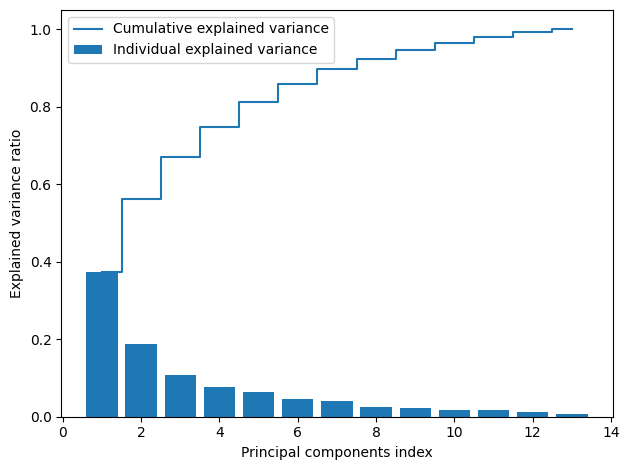

In [25]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, len(eigen_vals)+1), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal components index')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [34]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [35]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [36]:
X_train_pca = X_train_std.dot(w)

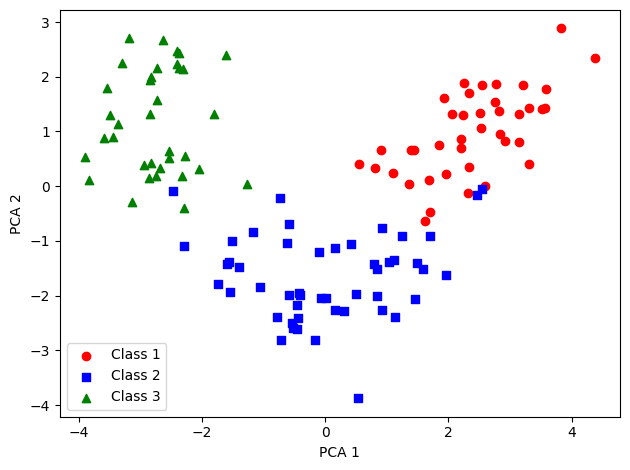

In [39]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.tight_layout()
plt.show()

## Principal component analysis in scikit-learn

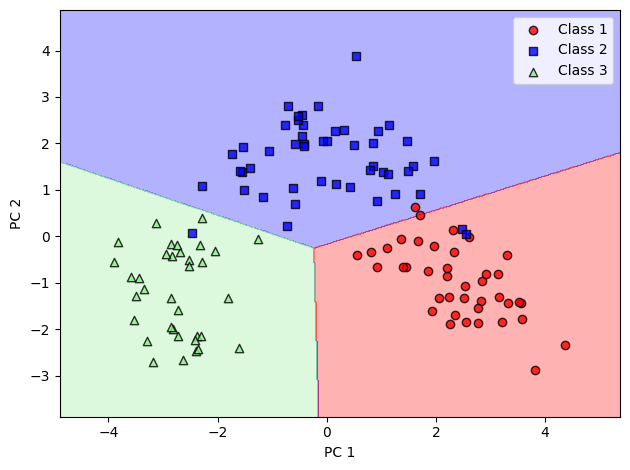

In [49]:
from utilsML.visualize import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
pca = PCA(n_components=None)
pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

## Assessing feature contributions

In [62]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

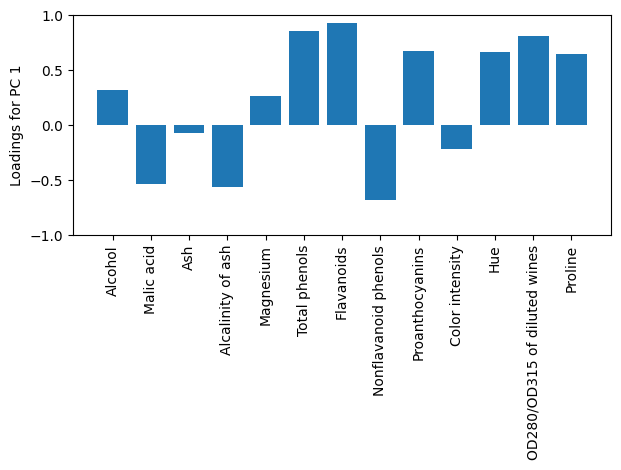

In [63]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(len(eigen_vals)), loadings[:, 0], align="center")
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(len(eigen_vals)))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

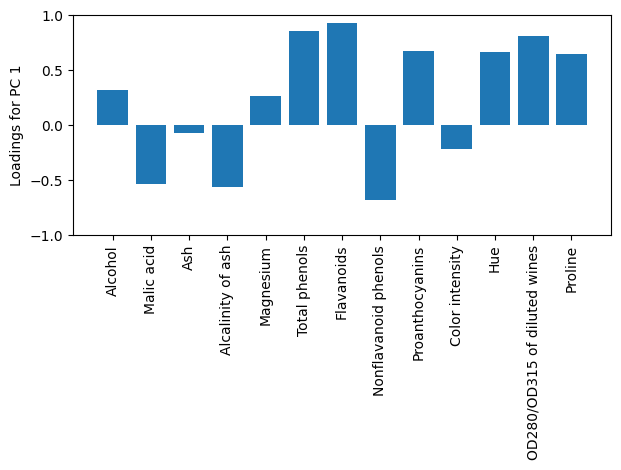

In [65]:
sklearn_loadings = pca.components_.T *np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(len(eigen_vals)), sklearn_loadings[:, 0], align="center")
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(len(eigen_vals)))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# Supervised data compression via linear discriminant analysis